In [1]:
%matplotlib inline

import sys
sys.path.append("../ohw_lter_vis") # go to parent dir
from load_Seward_CTD import make_CTD_dataframe
from load_Seward_zooplankton import make_zooplankton_dataframe

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


In [27]:
CTD_df = make_CTD_dataframe()
print('{}-{}'.format(CTD_df.time.min(),CTD_df.time.max()))
CTD_df.head()


2012-05-04 05:21:55-2012-05-09 22:16:58


,id,pressure,temperature,temperature2,conductivity,conductivity2,v0,v1,v2,v3,...,instrument,ship,cruise,junk1,PI,purpose,agency,region,junk2,time
0,1,0.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55
1,1,1.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55
2,1,2.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55
3,1,3.0,4.5292,4.5409,2.970221,2.969614,0.2992,0.0005,4.2261,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55
4,1,4.0,4.5027,4.5556,2.968559,2.970330,0.2819,0.0006,4.2225,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55


In [35]:
zoo_df = make_zooplankton_dataframe(year=2012)
zoo_df = zoo_df[zoo_df.time<pd.Timestamp('2012-05-10')]
zoo_df = zoo_df[zoo_df.time>pd.Timestamp('2012-05-04')]
print('{}-{}'.format(zoo_df.time.min(),zoo_df.time.max()))
zoo_df.head()

2012-05-04 11:20:00-2012-05-09 13:45:00


,Cruise,Year,Month,Day,Time (hh:mm:ss AM/PM),Station,Tow Depth (m),Sonic Depth (m),latitude,longitude,...,Class,Subclass,Infraclass,Order,Suborder,Infraorder,Family,Genus,Species,time
1,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,longiremis,2012-05-09 13:45:00
2,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,longiremis,2012-05-09 13:45:00
3,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,NaN,2012-05-09 13:45:00
4,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,NaN,2012-05-09 13:45:00
5,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,NaN,2012-05-09 13:45:00


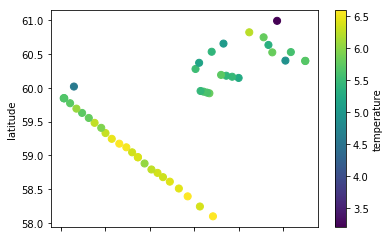

In [36]:
surface = CTD_df[CTD_df['pressure']==0]
#surface.describe()
surface.plot.scatter(x='longitude', y='latitude', c='temperature', s=50, colormap='viridis')

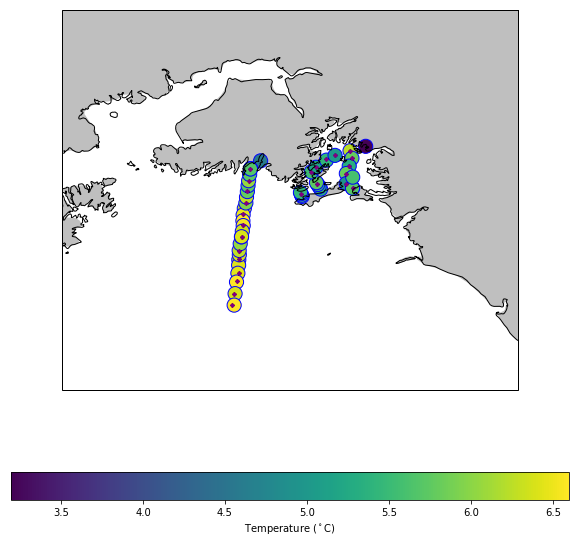

In [37]:
# Make a proper map

def make_map(projection=ccrs.PlateCarree(), figsize=(5, 5)):
    fig, ax = plt.subplots(
        figsize=figsize,
        subplot_kw={'projection': projection})
    return fig, ax


fig, ax = make_map(projection=ccrs.LambertConformal(), figsize=(10, 10))

ax.set_global()
ax.coastlines(resolution='10m', color='k')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='0.75')
ax.set_extent([-154, -142, 58.5, 61.], ccrs.Geodetic())

temps=ax.scatter(surface['longitude'], surface['latitude'], transform=ccrs.Geodetic(), s=200, c=surface['temperature'],
          edgecolors='blue', cmap='viridis', vmin=surface['temperature'].min(), vmax=surface['temperature'].max());
ax.scatter(zoo_df['longitude'], zoo_df['latitude'], transform=ccrs.Geodetic(), s=5, c='purple');
plt.colorbar(temps, orientation='horizontal', label='Temperature ($^\circ$C)')

In [43]:
CTD_GAK1 = surface['GAK1' in surface.station.str].
zoo_GAK1 = zoo_df[zoo_df.Station=='GAK1']
print(CTD_GAK1)
print(zoo_GAK1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().